In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_emotions_cleaned.csv')

In [ ]:
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,preprocessed_text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,game hurt
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,right nt care fuck em
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,man love reddit
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,name nowhere near falcon
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,right consider important document know damn th...


In [ ]:
df.shape

(606555, 29)

In [ ]:
df.isnull().sum()

,0
admiration,0
amusement,0
anger,0
annoyance,0
approval,0
caring,0
confusion,0
curiosity,0
desire,0
disappointment,0


In [ ]:
df = df.dropna()    #if needed

In [ ]:
df.shape

(606254, 29)

In [ ]:
# prompt: Haz una suma de emociones por fila de las 28 emociones

# Sumar las columnas de emociones por fila
df['suma_emociones'] = df.iloc[:, :28].sum(axis=1)

In [ ]:
df['suma_emociones'].describe()

,suma_emociones
count,606254.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
# Replace with the desired path in your Google Drive
output_path = '/content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_emotions_cleaned.csv'

#df.to_csv(output_path, index=False)

print(f"Dataset exported successfully to: {output_path}")

Dataset exported successfully to: /content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_emotions_cleaned.csv


In [ ]:
# Define the mapping of original emotions to new categories
emotion_mapping = {
    'alegria': ['joy', 'amusement', 'excitement', 'optimism'],
    'aprecio': ['love', 'caring', 'admiration'],
    'tristeza': ['sadness', 'grief', 'remorse'],
    'ira': ['anger', 'annoyance', 'disapproval'],
    'ansiedad': ['fear', 'nervousness', 'relief'],
    'sorpresa': ['surprise', 'realization', 'confusion'],
    'reconocimiento': ['approval', 'gratitude', 'pride'],
    'malestar': ['embarrassment', 'disgust', 'disappointment'],
    'interes': ['desire', 'curiosity'],
    'neutro': ['neutral']
}

# Create new columns for the unified emotions
for new_emotion, old_emotions in emotion_mapping.items():
    df[new_emotion] = df[old_emotions].sum(axis=1)

# Display the first few rows with the new columns
display(df.head())

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,alegria,aprecio,tristeza,ira,ansiedad,sorpresa,reconocimiento,malestar,interes,neutro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Create a list of the new emotion column names
new_emotion_columns = list(emotion_mapping.keys())

# Create the new DataFrame with 'preprocessed_text' and the new emotion columns
df_diez = df[['preprocessed_text'] + new_emotion_columns]

# Display the first few rows of the new DataFrame
display(df_diez.head())

,preprocessed_text,alegria,aprecio,tristeza,ira,ansiedad,sorpresa,reconocimiento,malestar,interes,neutro
0,game hurt,0,0,1,0,0,0,0,0,0,0
1,right nt care fuck em,0,0,0,0,0,0,0,0,0,1
2,man love reddit,0,1,0,0,0,0,0,0,0,0
3,name nowhere near falcon,0,0,0,0,0,0,0,0,0,1
4,right consider important document know damn th...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_diez.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606254 entries, 0 to 606554
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   preprocessed_text  606254 non-null  object
 1   alegria            606254 non-null  int64 
 2   aprecio            606254 non-null  int64 
 3   tristeza           606254 non-null  int64 
 4   ira                606254 non-null  int64 
 5   ansiedad           606254 non-null  int64 
 6   sorpresa           606254 non-null  int64 
 7   reconocimiento     606254 non-null  int64 
 8   malestar           606254 non-null  int64 
 9   interes            606254 non-null  int64 
 10  neutro             606254 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 55.5+ MB


In [ ]:
df_diez.describe()

,alegria,aprecio,tristeza,ira,ansiedad,sorpresa,reconocimiento,malestar,interes,neutro
count,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000
mean,0.274548,0.095895,0.213392,0.140524,0.087666,0.055086,0.039477,0.023846,0.017752,0.051813
std,0.446287,0.294448,0.409703,0.347530,0.282809,0.228148,0.194727,0.152571,0.132048,0.221650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_diez['suma_emociones'] = df_diez.iloc[:, 1:].sum(axis=1)
df_diez['suma_emociones'].describe()

/tmp/ipython-input-60-530188894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diez['suma_emociones'] = df_diez.iloc[:, 1:].sum(axis=1)


,suma_emociones
count,606254.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
df_diez.isnull().sum().sum()

np.int64(0)

In [ ]:
# Calculate the sum of each emotion column in df_diez
emotion_counts = df_diez[new_emotion_columns].sum().sort_values(ascending=False)

# Display the counts
display(emotion_counts)

,0
alegria,166446
tristeza,129370
ira,85193
aprecio,58137
ansiedad,53148
sorpresa,33396
neutro,31412
reconocimiento,23933
malestar,14457
interes,10762


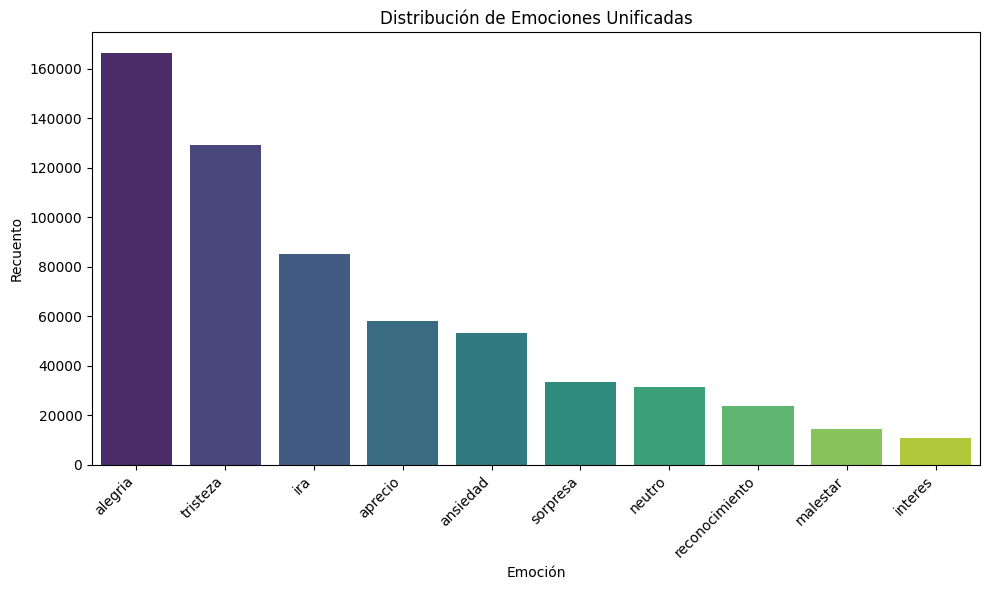

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the emotion counts
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis', hue=emotion_counts.index, legend=False)
plt.title('Distribución de Emociones Unificadas')
plt.xlabel('Emoción')
plt.ylabel('Recuento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Porcentaje de cada emoción en el dataset:
alegria           27.454829
tristeza          21.339241
ira               14.052361
aprecio            9.589545
ansiedad           8.766623
sorpresa           5.508582
neutro             5.181327
reconocimiento     3.947685
malestar           2.384644
interes            1.775164
dtype: float64


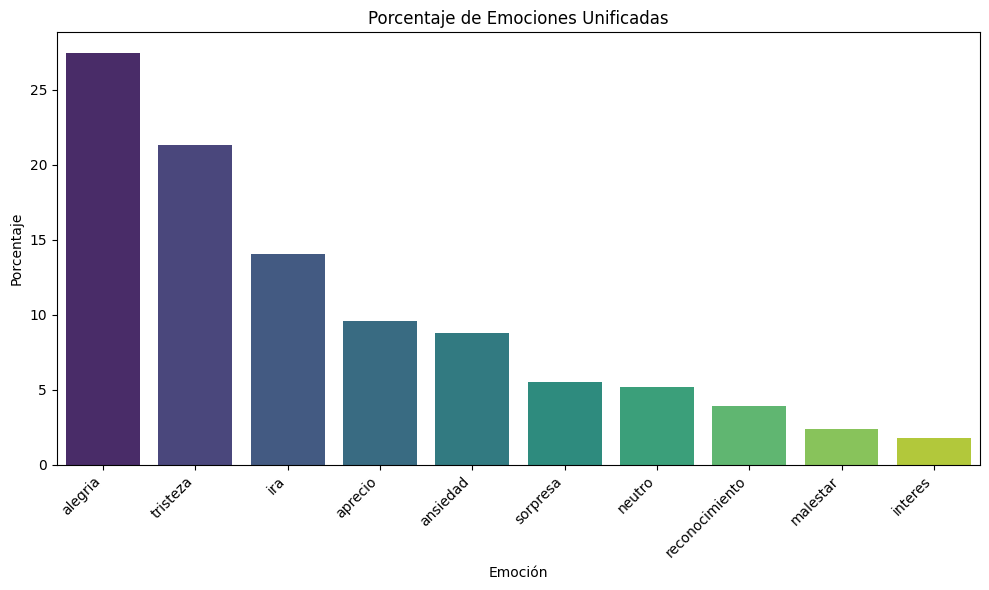

In [ ]:
# prompt: calcula los porcentajes de las emociones

import matplotlib.pyplot as plt
# Calculate the total number of instances (rows)
total_instances = len(df_diez)

# Calculate the percentage of each emotion
emotion_percentages = (emotion_counts / total_instances) * 100

# Display the percentages
print("\nPorcentaje de cada emoción en el dataset:")
print(emotion_percentages)

# Create a bar plot of the emotion percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_percentages.index, y=emotion_percentages.values, palette='viridis', hue=emotion_percentages.index, legend=False)
plt.title('Porcentaje de Emociones Unificadas')
plt.xlabel('Emoción')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_diez.describe()

,alegria,aprecio,tristeza,ira,ansiedad,sorpresa,reconocimiento,malestar,interes,neutro,suma_emociones
count,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.0
mean,0.274548,0.095895,0.213392,0.140524,0.087666,0.055086,0.039477,0.023846,0.017752,0.051813,1.0
std,0.446287,0.294448,0.409703,0.347530,0.282809,0.228148,0.194727,0.152571,0.132048,0.221650,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
df_diez.drop('suma_emociones', axis=1, inplace=True)

/tmp/ipython-input-66-1364801755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diez.drop('suma_emociones', axis=1, inplace=True)


In [ ]:
df_diez.shape

(606254, 11)

In [ ]:
# Replace with the desired path in your Google Drive
output_path = '/content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_diez_emociones.csv'

df_diez.to_csv(output_path, index=False)

print(f"Dataset exported successfully to: {output_path}")

Dataset exported successfully to: /content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_diez_emociones.csv


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_emotions_cleaned.csv')

In [ ]:
df.head()

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,preprocessed_text
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,game hurt
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,right nt care fuck em
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,man love reddit
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,name nowhere near falcon
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,right consider important document know damn th...


In [ ]:
df.isna().sum().sum()

np.int64(301)

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
# Define the mapping of original emotions to the new 6 categories
emotion_mapping_6 = {
    'alegria': ['joy', 'amusement', 'gratitude', 'love', 'excitement', 'pride', 'optimism', 'admiration', 'caring', 'approval'],
    'tristeza': ['sadness', 'grief', 'disappointment', 'remorse', 'embarrassment', 'realization'],
    'ansiedad': ['fear', 'nervousness', 'confusion'],
    'ira': ['anger', 'annoyance', 'disgust', 'disapproval'],
    'sorpresa': ['surprise', 'curiosity', 'desire'],
    'neutro': ['neutral', 'relief']
}

# Create new columns for the unified emotions in the original df
for new_emotion, old_emotions in emotion_mapping_6.items():
    # Check if all old_emotions exist in the DataFrame columns
    existing_columns = [col for col in old_emotions if col in df.columns]
    if existing_columns:
        df[new_emotion] = df[existing_columns].sum(axis=1)
    else:
        df[new_emotion] = 0 # or handle the case where none of the columns exist

# Display the first few rows with the new columns
display(df.head())

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,sadness,surprise,neutral,preprocessed_text,alegria,tristeza,ansiedad,ira,sorpresa,neutro
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,game hurt,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,right nt care fuck em,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,man love reddit,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,name nowhere near falcon,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,right consider important document know damn th...,1,0,0,0,0,0


In [ ]:
# Create a list of the new 6 emotion column names
new_emotion_columns_6 = list(emotion_mapping_6.keys())

# Create the new DataFrame with 'preprocessed_text' and the new 6 emotion columns
df_seis = df[['preprocessed_text'] + new_emotion_columns_6]

# Display the first few rows of the new DataFrame
display(df_seis.head())

,preprocessed_text,alegria,tristeza,ansiedad,ira,sorpresa,neutro
0,game hurt,0,1,0,0,0,0
1,right nt care fuck em,0,0,0,0,0,1
2,man love reddit,1,0,0,0,0,0
3,name nowhere near falcon,0,0,0,0,0,1
4,right consider important document know damn th...,1,0,0,0,0,0


In [ ]:
df_seis.describe()

,alegria,tristeza,ansiedad,ira,sorpresa,neutro
count,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000,606254.000000
mean,0.409921,0.242486,0.095792,0.148185,0.049887,0.053730
std,0.491819,0.428587,0.294305,0.355284,0.217711,0.225484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_seis.isnull().sum()

,0
preprocessed_text,0
alegria,0
tristeza,0
ansiedad,0
ira,0
sorpresa,0
neutro,0


In [ ]:
df_seis['suma_emociones'] = df_diez.iloc[:, 1:].sum(axis=1)
df_seis['suma_emociones'].describe()

/tmp/ipython-input-79-3258596367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seis['suma_emociones'] = df_diez.iloc[:, 1:].sum(axis=1)


,suma_emociones
count,606254.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
# Calculate the sum of each emotion column in df_seis
emotion_counts_seis = df_seis[new_emotion_columns_6].sum().sort_values(ascending=False)

# Display the counts
display(emotion_counts_seis)

,0
alegria,248516
tristeza,147008
ira,89838
ansiedad,58074
neutro,32574
sorpresa,30244


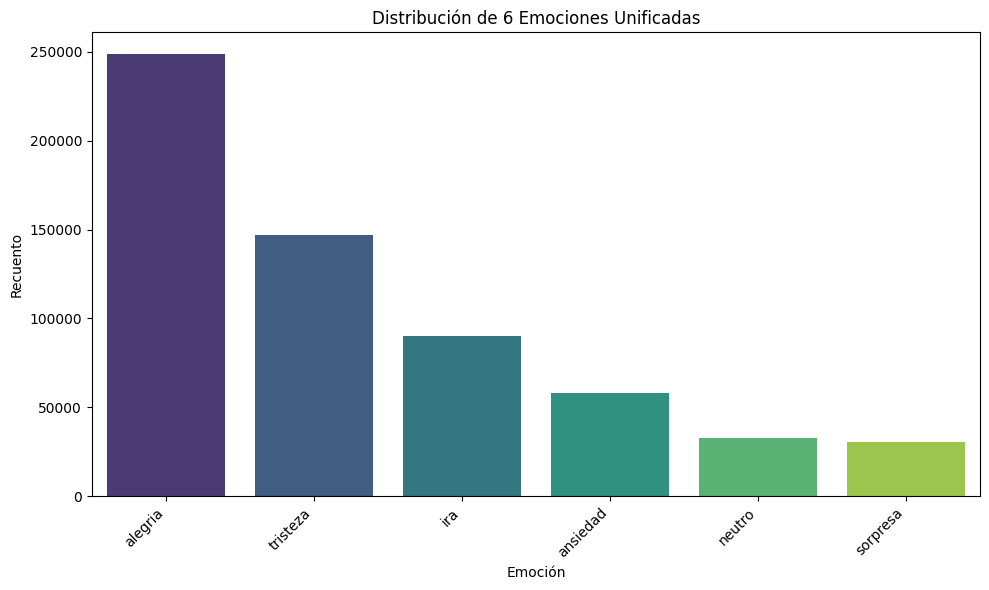

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the emotion counts
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts_seis.index, y=emotion_counts_seis.values, palette='viridis', hue=emotion_counts_seis.index, legend=False)
plt.title('Distribución de 6 Emociones Unificadas')
plt.xlabel('Emoción')
plt.ylabel('Recuento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Porcentaje de cada emoción en el dataset (6 categorías):
alegria     40.992059
tristeza    24.248582
ira         14.818541
ansiedad     9.579153
neutro       5.372995
sorpresa     4.988668
dtype: float64


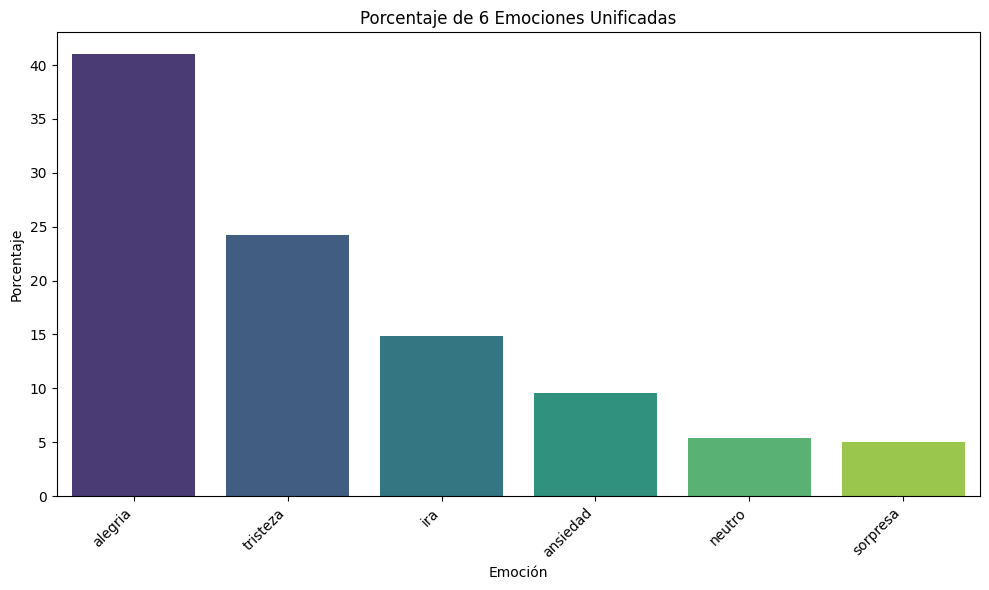

Dataset exported successfully to: /content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_seis_emociones.csv


In [ ]:
# prompt: calcula los porcentajes de las emociones

import matplotlib.pyplot as plt
# Calculate the total number of instances (rows)
total_instances_seis = len(df_seis)

# Calculate the percentage of each emotion for the 6 categories
emotion_percentages_seis = (emotion_counts_seis / total_instances_seis) * 100

# Display the percentages
print("\nPorcentaje de cada emoción en el dataset (6 categorías):")
print(emotion_percentages_seis)

# Create a bar plot of the emotion percentages for the 6 categories
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_percentages_seis.index, y=emotion_percentages_seis.values, palette='viridis', hue=emotion_percentages_seis.index, legend=False)
plt.title('Porcentaje de 6 Emociones Unificadas')
plt.xlabel('Emoción')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Replace with the desired path in your Google Drive
output_path_seis = '/content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_seis_emociones.csv'

df_seis.to_csv(output_path_seis, index=False)

print(f"Dataset exported successfully to: {output_path_seis}")

In [ ]:
df_seis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606254 entries, 0 to 606554
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   preprocessed_text  606254 non-null  object
 1   alegria            606254 non-null  int64 
 2   tristeza           606254 non-null  int64 
 3   ansiedad           606254 non-null  int64 
 4   ira                606254 non-null  int64 
 5   sorpresa           606254 non-null  int64 
 6   neutro             606254 non-null  int64 
 7   suma_emociones     606254 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 41.6+ MB


In [ ]:
# Replace with the desired path in your Google Drive
output_path = '/content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_seis_emociones.csv'

df_seis.to_csv(output_path, index=False)

print(f"Dataset exported successfully to: {output_path}")

Dataset exported successfully to: /content/drive/MyDrive/Trabajo Inteligencia Artificial/Notebooks/Dataset emociones/dataset_seis_emociones.csv
